# BME 411 Group Assignment

The aim of this assignment is to implement some of the introduced algorithms for solving uni-dimensional optimization problems from scratch and benchmark them.
In addition to a valid implementation, there are some follow-up question which you might anlyze and in some cases come up with a solution for them.
You have to submit your group jupyter notebook to the assigned dropbox on Learn.

Good luck


## Helper and Hints

Here are some tips and tricks you would use for performing your task.

### Use <font color='blue'>eval()</font> for evaluating a function



Example 


---


Here is an example with which you can get an idea of evaluating a function which has been written into a string. Imaging that we are going to evaluate the function:

> <font color='gray'>$y=\sqrt {\exp (x^2)}$ @ $x=10$</font>

Then we do this using the cell below:

In [1]:
from math import *
class Test:
  def __init__(self, x, expr):
    self.x = x
    self.expr = expr
  def __call__(self):
    x = self.x
    return eval(self.expr)

instatiation = Test(11,'sqrt(exp(pow(x,2)))')
y = instatiation()
y


1.8828518748858514e+26

### Stopping criteria for all the experiments
In any experiment, if you need to check the stopping criteria such that $x^*$ is well enough, use the equation below:

<center>
 $\frac{f(x^*-Δx)+f(x^*+Δx)}{2Δx}<ϵ$
</center>

Where $ϵ$ and $Δx$ must be a small scalar, like $ϵ=0.001$, and $Δx=0.001$.

---



## <font color='blue'>Your tasks</font>
You have to perform all the experiments for two different test cases:



> <font color='blue'>$f_1(x) = (x-4)^2$</font>



> <font color='blue'>$f_2(x) = e^{-x+10}+\frac{x^2}{3}-\frac{40}{3}$</font>



### <font color='blue'>Task 1: Swann's or bouding phase method</font>

Please write the 'call' function of the class below that takes an <font color='blue'>'initial point'</font> and <font color='blue'>'$Δ$'</font> parameters as constructor signature, and outputs a range of uncertainty with 3 decimal places of accuracy.

---



For both $f_1(x)$ and $f_2(x)$ functions, what will be the **final range of uncertainty** if the ***starting points*** and ***$\Delta$***s are according to the following table: 
<center>

scenario    |     starting point     | $Δ$
-----------:|:----------------:|: -----------------:|
Scenario 1 |       100          | 0.1
Scenario 2 |       100          | 1
Scenario 3 |       100          | 10
Scenario 4 |       10           | 0.1
Scenario 5 |       10           | 1
Scenario 6 |       10           | 10
Scenario 7 |       5            | 0.1
Scenario 8 |       5            | 1
Scenario 9 |       5            | 10
Scenario 10 |      1           | 0.1
Scenario 11 |      1           | 1
Scenario 12 |      1           | 10

</center>

What are your observations? 
Explain the effect of starting point and $Δ$ in your experiments.

From observing the experiments size of delta and the starting point there were certain trends that corresponded to the number of iterations and uncertainty ranges. A larger starting point corresponds to a larger uncertanty range. Also, a larger absolute delta value corresponds to less iterations as well as a smaller starting point corresponding with less iterations.

In [2]:
from math import *
class BoundingPhase:
    def __init__(self, starting_point:float , delta:float, expr:str, test_case:str):
        self.starting_point = starting_point
        self.delta = delta
        self.expr = expr
        self.test_case = test_case
        self.repeats = 0
   

    def __call__(self)->tuple:
        incorrect_inputs = False
        # decision of direction
        xd = self.starting_point + self.delta
        x = self.starting_point
        x_d = self.starting_point - self.delta

        f_xd = eval(self.expr, {}, {'x': xd})
        f_x = eval(self.expr, {}, {'x': x})
        f_x_d = eval(self.expr, {}, {'x': x_d})
    
        if(f_x_d >= f_x):
            if(f_x >= f_xd):
                self.delta = abs(self.delta); # delta is positive

            else:
                a = x_d; 
                b = xd;	
                incorrect_inputs = True
                
      
        elif((f_x_d <= f_x) & (f_x <= f_xd)):
            self.delta = -1*abs(self.delta); #delta is negative

        else:
            print('not unimodal')  # stop here

      
        k=0;
        xk = x;
        xk1= xk + self.delta*pow(2,k); 
  

        f_xk = eval(self.expr, {}, {'x': xk}) 
        f_xk1 = eval(self.expr, {}, {'x': xk1}) 
        
        if f_xk1 > f_xk:
            a = xk
            b = + self.delta*pow(2,k)
        else:
            while(f_xk1 <= f_xk):
                self.repeats += 1
                k= k+1;
                xk_1 = xk;
                f_xk_1 = f_xk;
                xk = xk1;
                f_xk = f_xk1;
                xk1 = xk + self.delta*pow(2,k);
                f_xk1 = eval(self.expr, {}, {'x': xk1})
            
            a=xk_1;
            b=xk1;


        # if delta is negative 
        if(b < a):
            temp=a;a=b;b=temp; #swap
        
        print(f'Test case: {self.test_case}')
        if incorrect_inputs:
            print('Inputs did not allow for algorithm to iterate.')
            print(f'Uncertainty of the root for {self.expr}: [{"{0:.3f}".format(x_d)}, {"{0:.3f}".format(xd)}]')
        else:
            print(f'Iterations required: {self.repeats}')
            print(f'Uncertainty of the root for {self.expr}: [{"{0:.3f}".format(a)}, {"{0:.3f}".format(b)}]')
        print()

        

In [3]:
def test_cases(expr):
    print(f'Test cases for {expr}:')
    #scenario 1
    starting_point = 100
    delta = 0.1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 1')
    final_range = bounding_phase()

    #scenario 2
    starting_point = 100
    delta = 1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 2')
    final_range = bounding_phase()

    #scenario 3
    starting_point = 100
    delta = 10
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 3')
    final_range = bounding_phase()

    #scenario 4
    starting_point = 10
    delta = 0.1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 4')
    final_range = bounding_phase()

    #scenario 5
    starting_point = 10
    delta = 1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 5')
    final_range = bounding_phase()

    #scenario 6
    starting_point = 10
    delta = 10
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 6')
    final_range = bounding_phase()

    #scenario 7
    starting_point = 5
    delta = 0.1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 7')
    final_range = bounding_phase()

    #scenario 8
    starting_point = 5
    delta = 1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 8')
    final_range = bounding_phase()

    #scenario 9
    starting_point = 5
    delta = 10
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 9')
    final_range = bounding_phase()

    #scenario 10
    starting_point = 1
    delta = 0.1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 10')
    final_range = bounding_phase()

    
    #scenario 11
    starting_point = 1
    delta = 1
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 11')
    final_range = bounding_phase()

    #scenario 12
    starting_point = 1
    delta = 10
    bounding_phase = BoundingPhase(starting_point, delta, expr, test_case='Scenario 12')
    final_range = bounding_phase()


test_cases(expr='pow(x-4,2)')
test_cases(expr='pow(2.7183,-x+10)+pow(x,2)/3-40/3')


Test cases for pow(x-4,2):
Test case: Scenario 1
Iterations required: 10
Uncertainty of the root for pow(x-4,2): [-104.700, 48.900]

Test case: Scenario 2
Iterations required: 7
Uncertainty of the root for pow(x-4,2): [-155.000, 37.000]

Test case: Scenario 3
Iterations required: 3
Uncertainty of the root for pow(x-4,2): [-50.000, 70.000]

Test case: Scenario 4
Iterations required: 6
Uncertainty of the root for pow(x-4,2): [-2.700, 6.900]

Test case: Scenario 5
Iterations required: 3
Uncertainty of the root for pow(x-4,2): [-5.000, 7.000]

Test case: Scenario 6
Iterations required: 1
Uncertainty of the root for pow(x-4,2): [-20.000, 10.000]

Test case: Scenario 7
Iterations required: 3
Uncertainty of the root for pow(x-4,2): [3.500, 4.700]

Test case: Scenario 8
Iterations required: 1
Uncertainty of the root for pow(x-4,2): [2.000, 5.000]

Test case: Scenario 9
Inputs did not allow for algorithm to iterate.
Uncertainty of the root for pow(x-4,2): [-5.000, 15.000]

Test case: Scenario 1

### <font color='blue'>Task 2: Golden Section technique</font>

In this section you are asked to write a class for **Golden Section technique** which we have already discussed in the class.
Write down a class such that gets a lower bound, upper bound, epsilon (stopping criteria) and an expression (the mathematical function itself) as the constructor signature, and output the range of uncertainty when it is called.

 

1.   Calculate the uncertainty range of both $f_1(x)$ and $f_2(x)$ for different test cases (you yourself define the test cases, it is totally up to you).
2.   Assess the effect of different lower bound, upper bound, epsilon on the results.
3. Keep track of number of iterations for you test cases. How do you relate the number of iterations and other parameters of the algorithm?


In [4]:
from math import *

class GoldenSection:
    def __init__(self, lower_bound:float , upper_bound:float, iterations:int, epsilon:float, expression:str, test_case:str):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.epsilon = epsilon
        self.expression = expression
        self.iterations = iterations
        self.repeats = 0
        self.test_case = test_case

    def __call__(self)->tuple:

        while self.iterations > self.repeats:
            if self.repeats == 0:  # only define initial a and b on first iteration
                a = self.lower_bound
                b = self.upper_bound
            p = 1/((1+ sqrt(5))/2)
            x1 = b - p*(b-a)
            x2 = a + p*(b-a)
            f_x1 = eval(self.expression, {}, {'x': x1})
            f_x2 = eval(self.expression, {}, {'x': x2})

            if f_x1 <= f_x2:
                b = x2
                x21 = x1
                x11 = b - p*(b-a) 

            if f_x1 > f_x2:
                a = x1
                x11= x2
                x21 = a+p*(b-a)

            f_x11 = eval(self.expression, {}, {'x': x11})
            f_x21 = eval(self.expression, {}, {'x': x21})
            
            self.repeats += 1
            if (b-a) < self.epsilon:
                break
            else:
                continue
        
        print(f'Test case: {self.test_case}')
        print(f'Iterations required: {self.repeats}')  # +1 to account for starting at 0
        if f_x11 < f_x21:
            print(f'Uncertainty of the root for {self.expression}: [{"{0:.3f}".format(a)}, {"{0:.3f}".format(x21)}]')
        if f_x11> f_x21:
            print(f'Uncertainty of the root for {self.expression}: [{"{0:.3f}".format(x11)}, {"{0:.3f}".format(b)}]')
        if f_x11 == f_x21:
            print(f'Uncertainty of the root for {self.expression}: [{"{0:.3f}".format(x11)}, {"{0:.3f}".format(x21)}]')
        print()

In [5]:
def test_cases(expression):
    iterations = 50  # set all max iterations to 50, all test cases should be under that
    print(f'Test cases for {expression}:')
    # large bounds
    lower_bound = -500
    upper_bound = 500
    epsilon = 1
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='large_bounds')
    final_range = golden_section()
    
    # medium bounds
    lower_bound = -100
    upper_bound = 100
    epsilon = 1
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='medium_bounds')
    final_range = golden_section()
    
    # small bounds
    lower_bound = -10
    upper_bound = 10
    epsilon = 1
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='small_bounds')
    final_range = golden_section()
    
    # large epsilon
    lower_bound = -100
    upper_bound = 100
    epsilon = 10
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='large_epsilon')
    final_range = golden_section()
    
    # medium epsilon
    lower_bound = -100
    upper_bound = 100
    epsilon = 1
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='medium_epsilon')
    final_range = golden_section()
    
    # small epsilon
    lower_bound = -100
    upper_bound = 100
    epsilon = 0.1
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='small_epsilon')
    final_range = golden_section()
    
    # large bound small epsilon
    lower_bound = -500
    upper_bound = 500
    epsilon = 0.1
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='large_bound_small_epsilon')
    final_range = golden_section()
    
    # small bound large epsilon
    lower_bound = -10
    upper_bound = 10
    epsilon = 10
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='small_bound_large_epsilon')
    final_range = golden_section()

test_cases(expression='pow(x-4,2)')
test_cases(expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3')


Test cases for pow(x-4,2):
Test case: large_bounds
Iterations required: 15
Uncertainty of the root for pow(x-4,2): [3.752, 4.205]

Test case: medium_bounds
Iterations required: 12
Uncertainty of the root for pow(x-4,2): [3.800, 4.184]

Test case: small_bounds
Iterations required: 7
Uncertainty of the root for pow(x-4,2): [3.738, 4.164]

Test case: large_epsilon
Iterations required: 7
Uncertainty of the root for pow(x-4,2): [1.316, 5.573]

Test case: medium_epsilon
Iterations required: 12
Uncertainty of the root for pow(x-4,2): [3.800, 4.184]

Test case: small_epsilon
Iterations required: 16
Uncertainty of the root for pow(x-4,2): [3.981, 4.037]

Test case: large_bound_small_epsilon
Iterations required: 20
Uncertainty of the root for pow(x-4,2): [3.991, 4.032]

Test case: small_bound_large_epsilon
Iterations required: 2
Uncertainty of the root for pow(x-4,2): [2.361, 7.082]

Test cases for pow(2.7183,-x+10)+pow(x,2)/3-40/3:
Test case: large_bounds
Iterations required: 15
Uncertainty of 

Having larger bounds and smaller epsilons increase the number of iterations required, and smaller bounds and larger epsilons decrease the number of iterations required.

Having larger initial bounds means that the bounds start farther from the root of the function, and therefore require more iterations to make the interval small enough to meet the epsilon interval size requirement. The opposite is true for smaller initial bounds.

Having smaller epsilons mean that the required interval bound size is smaller, and therefore more iterations need to occur to make the interval small enough to meet the set interval size requirement. The opposite is true for larger epsilons.

The effect of iteration increase from large bounds and small epsilons are cumulative, meaning that having large bounds and small epsilons will result in the greatest number of required iterations, with small bounds and large epsilons requiring the smallest number of iterations.

### <font color='blue'>Task 3: Interval Halving technique</font>

In this section you are asked to write a class for Interval Halving technique that we have already discussed in the class.
Write a class such that gets a lower bound, upper bound, epsilon (stopping criteria) and an expression (the mathematical function itself) as the constructor signature, and outputs the range of uncertainty when it is called.

For both $f_1(x)$ and $f_2(x)$ :

1.   Calculate the uncertainty range for different test cases (you yourself define the test cases).
2.   Assess the effect of different lower bound, upper bound, epsilon on the results.
3. Keep track of number of iterations for you test cases. How do you relate the number of iterations and other parameters of the algorithm?

In [6]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


class IntervalHalving:
    def __init__(self, lower_bound:float , upper_bound:float, iterations:int, epsilon:float, expression:str, test_case:str):
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.epsilon = epsilon
        self.iterations = iterations
        self.expression = expression
        self.repeats = 0
        self.test_case = test_case

    def __call__(self)->tuple:
        while self.iterations > self.repeats:  # while loop runs until epsilon > L or repeats == iterations
            if self.repeats == 0:  # only define on the first iteration
                L = self.upper_bound - self.lower_bound
                xm = (self.lower_bound + self.upper_bound)/2
            x1 = self.lower_bound + L/4
            x2 = self.upper_bound - L/4
            f_xm = eval(self.expression, {}, {'x': xm})
            f_x1 = eval(self.expression, {}, {'x': x1})
            f_x2 = eval(self.expression, {}, {'x': x2})

            if f_x1 < f_xm:
                self.upper_bound = xm
                xm = x1   
            if f_x2 < f_xm:
                self.lower_bound = xm
                xm = x2
            if f_x1 >= f_xm <= f_x2:
                self.lower_bound = x1
                self.upper_bound = x2

            L = self.upper_bound - self.lower_bound
            if self.epsilon > L:
                self.repeats += 1
                break
            else:
                self.repeats += 1

        print(f'Test case: {self.test_case}')
        print(f'Iterations required: {self.repeats+1}')  # +1 to account for starting at 0
        print(f'Uncertainty of the root for {self.expression}: [{"{0:.3f}".format(self.lower_bound)}, {"{0:.3f}".format(self.upper_bound)}]')
        print()
    

In [7]:
def test_cases(expression):
    iterations = 50  # set all max iterations to 50, all test cases should be under that
    print(f'Test cases for {expression}:')
    # large bounds
    lower_bound = -1000
    upper_bound = 1000
    epsilon = 1
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='large_bounds')
    final_range = interval_halving()
    
    # medium bounds
    lower_bound = -100
    upper_bound = 100
    epsilon = 1
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='medium_bounds')
    final_range = interval_halving()
    
    # small bounds
    lower_bound = -10
    upper_bound = 10
    epsilon = 1
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='small_bounds')
    final_range = interval_halving()
    
    # large epsilon
    lower_bound = -100
    upper_bound = 100
    epsilon = 10
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='large_epsilon')
    final_range = interval_halving()
    
    # medium epsilon
    lower_bound = -100
    upper_bound = 100
    epsilon = 1
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='medium_epsilon')
    final_range = interval_halving()
    
    # small epsilon
    lower_bound = -100
    upper_bound = 100
    epsilon = 0.01
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='small_epsilon')
    final_range = interval_halving()
    
    # large bound small epsilon
    lower_bound = -1000
    upper_bound = 1000
    epsilon = 0.01
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='large_bound_small_epsilon')
    final_range = interval_halving()
    
    # small bound large epsilon
    lower_bound = -10
    upper_bound = 10
    epsilon = 10
    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression=expression, test_case='small_bound_large_epsilon')
    final_range = interval_halving()

test_cases(expression='pow(x-4,2)')
test_cases(expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3')

Test cases for pow(x-4,2):
Test case: large_bounds
Iterations required: 12
Uncertainty of the root for pow(x-4,2): [3.418, 4.395]

Test case: medium_bounds
Iterations required: 9
Uncertainty of the root for pow(x-4,2): [3.516, 4.297]

Test case: small_bounds
Iterations required: 6
Uncertainty of the root for pow(x-4,2): [3.750, 4.375]

Test case: large_epsilon
Iterations required: 6
Uncertainty of the root for pow(x-4,2): [0.000, 6.250]

Test case: medium_epsilon
Iterations required: 9
Uncertainty of the root for pow(x-4,2): [3.516, 4.297]

Test case: small_epsilon
Iterations required: 16
Uncertainty of the root for pow(x-4,2): [3.998, 4.004]

Test case: large_bound_small_epsilon
Iterations required: 19
Uncertainty of the root for pow(x-4,2): [3.998, 4.005]

Test case: small_bound_large_epsilon
Iterations required: 3
Uncertainty of the root for pow(x-4,2): [2.500, 7.500]

Test cases for pow(2.7183,-x+10)+pow(x,2)/3-40/3:
Test case: large_bounds
Iterations required: 12
Uncertainty of th

As seen from the test cases of both functions above, having larger bounds and smaller epsilons increase the number of iterations required, and smaller bounds and larger epsilons decrease the number of iterations required.

Having larger initial bounds means that the bounds start farther from the root of the function, and therefore require more interval halving repeats to make the interval small enough to meet the epsilon interval size requirement. The opposite is true for smaller initial bounds.

Having smaller epsilons mean that the required interval bound size is smaller, and therefore more interval halving repeats need to occur to make the interval small enough to meet the set interval size requirement. The opposite is true for larger epsilons.

The effect of iteration increase from large bounds and small epsilons are cumulative, meaning that having large bounds and small epsilons will result in the greatest number of required iterations, with small bounds and large epsilons requiring the smallest number of iterations.

### <font color='blue'>Task 4: Finite difference approxiamations</font>
Finite difference is often used as an approximation of the derivative, typically in numerical differentiation as we discussed in the class.

The derivative of a differentiable function $f$ at a point $x=a$ is defined by:

<center>
 <font color='blue'>$f'(x=a)=lim _{h\to 0} \frac{f(a-h)+f(a+h)}{2h}$</font> 
</center>

 We can assume a small scalar like $h=0.01$ and evaluate the derivative of any differentiable function with just **two** function evaluations.

 Also the second order derivative of any differentiable function at a point can be approximated using:
 
<center>
<font color='blue'>$ f''(x=a) = {lim _{h\to 0} \frac {f(a+h)-2f(a)+f(a-h)}{h^{2}}}$</font> 
 
</center>

Similar to first order derivative  we can assume a small scalar like $h=0.01$ and evaluate the second order derivative of any 2nd order differentiable function with just **three** function evaluations.

Your task is to write a class namely **'Derivative'** with at least 2 methods: one for calculating the first order and second one for second order derivative.


In [8]:
class Derivative:
    def __init__(self, h)-> None:
        self.h = h
        pass

    def f_prime(self, point: float, expression:str)->float:
        # using subtract in numerator and swapping f(a-h) and f(a+h) bc equation given in question is wrong
        derivative_1 = (eval(expression, {}, {'x': point+self.h}) - eval(expression, {}, {'x': point-self.h}))/(2*self.h)
        return derivative_1

    def f_prime_prime(self, point: float, expression:str)->float:
        derivative_2 = (eval(expression, {}, {'x': point+self.h}) - 2*eval(expression, {}, {'x': point}) + eval(expression, {}, {'x': point-self.h}))/(pow(self.h,2))
        return derivative_2

In [9]:
# validated solutions by comparing with output from https://math24.pro/differentiate_value

derivative = Derivative(h=0.01)
print(f"First derivative of pow(x-4,2) at x=0: {'{0:.3f}'.format(derivative.f_prime(point=0, expression='pow(x-4,2)'))}")
print(f"Second derivative of pow(x-4,2) at x=0: {'{0:.3f}'.format(derivative.f_prime_prime(point=0, expression='pow(x-4,2)'))}")
print(f"First derivative of pow(x-4,2) at x=10: {'{0:.3f}'.format(derivative.f_prime(point=10, expression='pow(x-4,2)'))}")
print(f"Second derivative of pow(x-4,2) at x=10: {'{0:.3f}'.format(derivative.f_prime_prime(point=10, expression='pow(x-4,2)'))}")

print(f"First derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=0: {'{0:.3f}'.format(derivative.f_prime(point=0, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3'))}")
print(f"Second derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=0: {'{0:.3f}'.format(derivative.f_prime_prime(point=0, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3'))}")
print(f"First derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=10: {'{0:.3f}'.format(derivative.f_prime(point=10, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3'))}")
print(f"Second derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=10: {'{0:.3f}'.format(derivative.f_prime_prime(point=10, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3'))}")

First derivative of pow(x-4,2) at x=0: -8.000
Second derivative of pow(x-4,2) at x=0: 2.000
First derivative of pow(x-4,2) at x=10: 12.000
Second derivative of pow(x-4,2) at x=10: 2.000
First derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=0: -22028.453
Second derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=0: 22029.083
First derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=10: 5.667
Second derivative of pow(2.7183,-x+10)+pow(x,2)/3-40/3 at x=10: 1.667


### <font color='blue'>Task 5: Newton method </font>  

In addition to methods which used only function values, we had another kind of techniques which used derivative of the funtion, like newton method.

In this section you are asked to write down a class for Newton's technique that we have already discussed in the class.

<center>
`For evaluating the first and second order derivative of the function use the Derivative class you already written for previous section.`
</center>

Write down a class such that gets an object of Derivative class (you already have it from previous section), an initial guess, epsilon (stopping criteria) and an expression (the mathematical function itself) as the constructor signature, and output the minimum of the function when it is called.


---

For both $f_1(x)$ and $f_2(x)$ :

1.   Calculate the minimum for different test cases (you yourself define the test cases).
2.   Assess the effect of different parameters, like initial guess and epsilon on the results.
3. Keep track of number of iterations for you test cases. How do you relate the number of iterations and other parameters of the algorithm?
4. For a fixed starting point, change ϵ from 10.0 to 0.01 with 0.01 step size, i.e.:

> ```
import numpy as np
epsilon = np.arange(0.01,10,0.01)
```

> and compare the minimum the algorithm finds for each of these ϵs. You may plot $x^*$ versus $ϵ$.

In [10]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

class Newton:
  def __init__(self, derivative_obj: Derivative, initial_guess: float, epsilon: float, iterations: int, expression: str, test_case: str) -> None:
    self.derivative_obj = derivative_obj
    self.initial_guess = initial_guess
    self.epsilon = epsilon
    self.expression = expression
    self.iterations = iterations
    self.test_case = test_case

  def __call__(self)->float:
    if self.test_case=='plot':
      x = self.initial_guess
      for i in range(0, self.iterations):
        if abs(derivative_obj.f_prime(point=x, expression=self.expression)) <= self.epsilon:
          return x, i
        else:
          x = x - self.derivative_obj.f_prime(point=x, expression=self.expression)/self.derivative_obj.f_prime_prime(point=x, expression=self.expression)
      return 0, 0

    else:
      print(f'Test case: {self.test_case}')
      print(f'Inputs: initial_guess={self.initial_guess}, epsilon={self.epsilon}, iterations={self.iterations}')
      x = self.initial_guess
      for i in range(0, self.iterations):
        if abs(derivative_obj.f_prime(point=x, expression=self.expression)) <= self.epsilon:
          print(f'Minimum for the expression {self.expression}: {x}, Found in {i} iterations')
          print()
          return x, i
        else:
          x = x - self.derivative_obj.f_prime(point=x, expression=self.expression)/self.derivative_obj.f_prime_prime(point=x, expression=self.expression)
      print(f'Minimum for the expression {self.expression}: Not Found')
      print()
      return 0, 0
        


Test case: small epsilon
Inputs: initial_guess=5, epsilon=0.001, iterations=10
Minimum for the expression pow(x-4,2): 3.999999999999911, Found in 1 iterations

Test case: small epsilon
Inputs: initial_guess=5, epsilon=0.001, iterations=10
Minimum for the expression pow(2.7183,-x+10)+pow(x,2)/3-40/3: 8.290357945664745, Found in 6 iterations


Test case: medium epsilon
Inputs: initial_guess=5, epsilon=0.1, iterations=10
Minimum for the expression pow(x-4,2): 3.999999999999911, Found in 1 iterations

Test case: medium epsilon
Inputs: initial_guess=5, epsilon=0.1, iterations=10
Minimum for the expression pow(2.7183,-x+10)+pow(x,2)/3-40/3: 8.28050323585729, Found in 5 iterations


Test case: large epsilon
Inputs: initial_guess=5, epsilon=10, iterations=10
Minimum for the expression pow(x-4,2): 5, Found in 0 iterations

Test case: large epsilon
Inputs: initial_guess=5, epsilon=10, iterations=10
Minimum for the expression pow(2.7183,-x+10)+pow(x,2)/3-40/3: 7.6631286035190405, Found in 3 itera

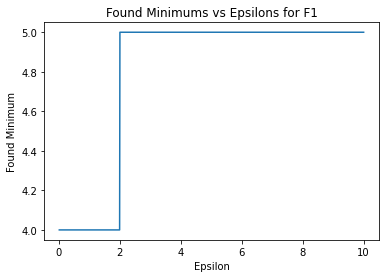

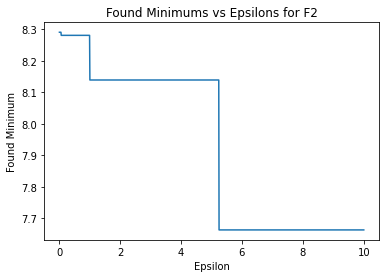

In [11]:
derivative_obj = Derivative(h=0.01)
## small epsilon
newton_1 = Newton(derivative_obj, initial_guess=5, epsilon=0.001, iterations=10, expression='pow(x-4,2)', test_case='small epsilon')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=5, epsilon=0.001, iterations=10, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='small epsilon')
newton_2()
print()

## medium epsilon
newton_1 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=10, expression='pow(x-4,2)', test_case='medium epsilon')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=10, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='medium epsilon')
newton_2()
print()

## large epsilon
newton_1 = Newton(derivative_obj, initial_guess=5, epsilon=10, iterations=10, expression='pow(x-4,2)', test_case='large epsilon')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=5, epsilon=10, iterations=10, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='large epsilon')
newton_2()
print()

## small iterations
newton_1 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=3, expression='pow(x-4,2)', test_case='small iterations')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=3, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='small iterations')
newton_2()
print()

## medium iterations
newton_1 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=10, expression='pow(x-4,2)', test_case='medium iterations')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=10, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='medium iterations')
newton_2()
print()

## large iterations
newton_1 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=50, expression='pow(x-4,2)', test_case='large iterations')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=5, epsilon=0.1, iterations=50, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='large iterations')
newton_2()
print()

## accurate initial guess
newton_1 = Newton(derivative_obj, initial_guess=4, epsilon=0.1, iterations=15, expression='pow(x-4,2)', test_case='accurate initial guess')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=8.29, epsilon=0.1, iterations=15, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='accurate initial guess')
newton_2()
print()

## high initial guess
newton_1 = Newton(derivative_obj, initial_guess=15, epsilon=0.1, iterations=15, expression='pow(x-4,2)', test_case='high initial guess')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=15, epsilon=0.1, iterations=15, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='high initial guess')
newton_2()
print()

## very high initial guess
newton_1 = Newton(derivative_obj, initial_guess=500, epsilon=0.1, iterations=15, expression='pow(x-4,2)', test_case='very high initial guess')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=500, epsilon=0.1, iterations=15, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='very high initial guess')
newton_2()
print()

## low initial guess
newton_1 = Newton(derivative_obj, initial_guess=0, epsilon=0.1, iterations=15, expression='pow(x-4,2)', test_case='low initial guess')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=0, epsilon=0.1, iterations=15, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='low initial guess')
newton_2()
print()

## very low initial guess
newton_1 = Newton(derivative_obj, initial_guess=-500, epsilon=0.1, iterations=15, expression='pow(x-4,2)', test_case='very low initial guess')
newton_1()
newton_2 = Newton(derivative_obj, initial_guess=-500, epsilon=0.1, iterations=15, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='very low initial guess')
newton_2()
print()

##plotting epsilon vs. minimums of f1
epsilon = np.linspace(0.01,10.0,1000)
x = [0] * len(epsilon)
iterations_list = [0] * len(epsilon)
for i in range(len(epsilon)):
  newton = Newton(derivative_obj, initial_guess=5, epsilon=epsilon[i], iterations=10, expression='pow(x-4,2)', test_case='plot')
  x[i] = newton()[0]
  iterations_list[i] = newton()[1]
plt.plot(epsilon, x)
plt.xlabel('Epsilon')
plt.ylabel('Found Minimum')
plt.title('Found Minimums vs Epsilons for F1')
plt.show()


##plotting epsilon vs. minimums of f2
epsilon = np.linspace(0.01,10.0,1000)
x = [0] * len(epsilon)
for i in range(len(epsilon)):
  newton = Newton(derivative_obj, initial_guess=5, epsilon=epsilon[i], iterations=10, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='plot')
  x[i] = newton()[0]

plt.plot(epsilon, x)
plt.xlabel('Epsilon')
plt.ylabel('Found Minimum')
plt.title('Found Minimums vs Epsilons for F2')
plt.show()

In summary from the test cases provided above, we find the following:

1. Variance in the number of maximum iterations affects the likelihood of finding a mimimum that meets the stopping criteria, a low input may not cycle enough, while a high input is more likely to find a solution prior to maxing out
2. Variance in the epsilon input was described as it relates to the found minimum in the two plots, however when looking at the corresponding iterations required, it is seen that a lower epsilon will require more iterations as the stopping criteria is more strict.
3. Variance in the initial guess is not strictly related to the magnitude of the value, but the distance from the actual minimum in which you are looking to find, thus it is seen from the test cases that the initial guess does not tend to have much impact on the number of iterations required, though that is with the exception of the 'very low initial guess' test case for f2, in which a minimum is not found, though this is due to the value that occurs in this function at x=-500 and the inability of handling such a large value.

###  <font color='blue'>Task 6: Benchmarking the algorithms</font>  
In this task, according to your experiments you have done so far, compare golden section, interval halving and Newton's method in terms of time complexity. What are your findings from these experiments? How do you select the best technique among others?

In [12]:
def test_cases():
    iterations = 50  # set all max iterations to 50, all test cases should be under that
    epsilon = 0.1  # set all epsilons to 0.1 for consistency
    print('Test cases for pow(x-4,2):')

    # [0, 8]
    lower_bound = 0
    upper_bound = 8
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression='pow(x-4,2)', test_case='Golden Section: [0, 8]')
    final_range = golden_section()

    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression='pow(x-4,2)', test_case='Interval Halving: [0, 8]')
    final_range = interval_halving()

    newton = Newton(derivative_obj, initial_guess=12, epsilon=epsilon, iterations=iterations, expression='pow(x-4,2)', test_case='Newtons Method: Guess 12')
    newton()

    # [-10, 30]
    lower_bound = -10
    upper_bound = 30
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression='pow(x-4,2)', test_case='Golden Section: [-10, 30]')
    final_range = golden_section()

    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression='pow(x-4,2)', test_case='Interval Halving: [-10, 30]')
    final_range = interval_halving()

    newton = Newton(derivative_obj, initial_guess=44, epsilon=epsilon, iterations=iterations, expression='pow(x-4,2)', test_case='Newtons Method: Guess 44')
    newton()

    # [-100, 100]
    lower_bound = -100
    upper_bound = 100
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression='pow(x-4,2)', test_case='Golden Section: [-100, 100]')
    final_range = golden_section()

    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression='pow(x-4,2)', test_case='Interval Halving: [-100, 100]')
    final_range = interval_halving()

    newton = Newton(derivative_obj, initial_guess=204, epsilon=epsilon, iterations=iterations, expression='pow(x-4,2)', test_case='Newtons Method: Guess 204')
    newton()

    print('Test cases for pow(2.7183,-x+10)+pow(x,2)/3-40/3:')
    # [4, 12]
    lower_bound = -4
    upper_bound = 12
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Golden Section: [4, 12]')
    final_range = golden_section()

    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Interval Halving: [4, 12]')
    final_range = interval_halving()

    newton = Newton(derivative_obj, initial_guess=16.29, epsilon=epsilon, iterations=iterations, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Newtons Method: Guess 16.29')
    newton()

    # [-10, 30]
    lower_bound = -10
    upper_bound = 30
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Golden Section: [-10, 30]')
    final_range = golden_section()

    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Interval Halving: [-10, 30]')
    final_range = interval_halving()

    newton = Newton(derivative_obj, initial_guess=48.29, epsilon=epsilon, iterations=iterations, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Newtons Method: Guess 48.29')
    newton()

    # [-100, 100]
    lower_bound = -100
    upper_bound = 100
    golden_section = GoldenSection(lower_bound,upper_bound, iterations, epsilon, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Golden Section: [-100, 100]')
    final_range = golden_section()

    interval_halving = IntervalHalving(lower_bound,upper_bound, iterations, epsilon, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Interval Halving: [-100, 100]')
    final_range = interval_halving()

    newton = Newton(derivative_obj, initial_guess=208.29, epsilon=epsilon, iterations=iterations, expression='pow(2.7183,-x+10)+pow(x,2)/3-40/3', test_case='Newtons Method: Guess 208.29')
    newton()

test_cases()

Test cases for pow(x-4,2):
Test case: Golden Section: [0, 8]
Iterations required: 10
Uncertainty of the root for pow(x-4,2): [3.972, 4.012]

Test case: Interval Halving: [0, 8]
Iterations required: 8
Uncertainty of the root for pow(x-4,2): [3.969, 4.031]

Test case: Newtons Method: Guess 12
Inputs: initial_guess=12, epsilon=0.1, iterations=50
Minimum for the expression pow(x-4,2): 4.000000000265743, Found in 1 iterations

Test case: Golden Section: [-10, 30]
Iterations required: 13
Uncertainty of the root for pow(x-4,2): [3.978, 4.025]

Test case: Interval Halving: [-10, 30]
Iterations required: 10
Uncertainty of the root for pow(x-4,2): [3.945, 4.023]

Test case: Newtons Method: Guess 44
Inputs: initial_guess=44, epsilon=0.1, iterations=50
Minimum for the expression pow(x-4,2): 4.000000035441872, Found in 1 iterations

Test case: Golden Section: [-100, 100]
Iterations required: 16
Uncertainty of the root for pow(x-4,2): [3.981, 4.037]

Test case: Interval Halving: [-100, 100]
Iteratio

From the test cases above, it can be seen that the methods used can be sorted as follows (from most to fewest iterations required): Golden Section, Interval Halving, Newton's Method. This makes sense as Newton's Method is known for being efficient, especially for quadratic functions.

- Golden section technique is seen to require between 10-16 iterations with the given test cases.
- Interval halving technique uses between 8-12 for the given test cases.
- Newton's method uses 1, and 11 iterations for f1 and f2 respectively.

As per instructions provided in announcement on Learn, the 3 methods were compared by letting the initial range of bounds for Golden Section and Interval Halving equal the difference between initial guess and exact minimum for Newton's Method. 

The test cases chosen had input range approximately around the root for each function equal to 8, 40 and 200, for small medium and large respectively. These were used to show any differences between iterations required and the growth of the range. And the biggest takeaway from this is that Newton's method is more resilient to a change in range. While being very efficient in the face of a quadratic (f1), Newton's method is slightly less efficient than Interval Halving for f2 when the input range is small and medium, but begins to be more efficient with the larger range. Interval Halving is more efficient than Golden Section for every test case ran, making it a more efficient choice for root finding. Comparibly to Newton's method, Newton's method is always more efficient for quadratic functions. However, Interval Halving requires less iterations for F2 when the upper and lower bounds range has a length of 8 and 40, but requiring more iterations when the range was 200. This implies that Interval halving is more efficient for non-quadratic root finding for small range of bounds, but Newton's method becomes more efficient when the bounds are larger. 
